Copyright 2020 Dale Bowman, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Multiple linear regression  

In many data sets there may be several predictor variables that have an effect on a response variable.
 In fact, the *interaction* between variables may also be used to predict response.
 When we incorporate these additional predictor variables into the analysis, the model is called *multiple regression* .
 The multiple regression model builds on the simple linear regression model by adding additional predictors with corresponding parameters.
 
## What you will learn

In the sections that follow you will learn about multiple regression, an extension of simple linear regression, and how it can be used to model your data for prediction.  We will study the following:

- The multiple regression model
- Interaction effects
- Feature selection
- Categorical variables
- Diagnostics

## When to use multiple regression

Multiple regression models are useful when you have a continuous response variable and you believe there are multiple predictors that have a linear relationship with the response variable.  The ultimate goals of fitting a multiple regression model are to 1) predict the response for a new set of features and 2) determine which predictors are most influential on the response.


## Multiple Regression Model
Let's suppose we are interested in determining what factors might influence a baby's birth weight.
 In our data set we have information on birth weight, our response, and predictors: mother's age, weight and height and gestation period.
 A *main effects model*  includes each of the possible predictors but no interactions.
 Suppose we name these features as in the chart below.
 
| Variable | Type  | Description       |
|:--------|:-------|:-------------------|
| BW       | Ratio | baby birth weight |
| MA       | Ratio | mother's age      |
| MW       | Ratio | mother's weight   |
| MH       | Ratio | mother's height   |
| GP       | Ratio | gestation period  |

Then the theoretical main effects multiple regression model is 

$$BW = \beta_0 + \beta_1 MA + \beta_2 MW + \beta_3 MH + \beta_4 GP+ \epsilon.$$ 

Now we have five parameters to estimate from the data, $\beta_0, \beta_1, \beta_2, \beta_3$ and $\beta_4$.
 The random error term, $\epsilon$ has the same interpretation as in simple linear regression and is assumed to come from a normal distribution with mean equal to zero and variance equal to $\sigma^2$.
 Note that multiple regression also includes the polynomial models discussed in the simple linear regression notebook.
 
One of the most important things to notice about the equation above is that each variable makes a contribution **independently** of the other variables.
This is sometimes called **additivity**: the effects of predictor variable are added together to get the total effect on `BW`.

## Interaction Effects

Suppose in the example, through exploratory data analysis, we discover that younger mothers with long gestational times tend to have heavier babies, but older mother with short gestational times tend to have lighter babies.
 This could indicate an interaction effect on the response.
 When there is an interaction effect, the effects of the variables involved are not additive.
 
 Different numbers of variables can be involved in an interaction.
 When two features are involved in the interaction it is called a *two-way interaction* .
 There are three-way and higher interactions possible as well, but they are less common in practice.
 The *full model*  includes main effects and all interactions.
 For the example given here there are 6 two-way interactions possible between the variables, 4 possible three-way, and 1 four-way interaction in the full model.
 
 Often in practice we fit the full model to check for significant interaction effects.
 If there are no interactions that are significantly different from zero, we can drop the interaction terms and fit the main effects model to see which of those effects are significant.
 If interaction effects are significant (important in predicting the behavior of the response) then we will interpret the effects of the model in terms of the interaction.
 
<!--  NOTE: not sure if correction for multiple comparisons is outside the scope here; I would in general not recommend to students that they test all possible interactions unless they had a theoretical reason to, or unless they were doinging something exploratory and then would collect new data to test any interaction found. -->

## Feature Selection

Suppose we run a full model for the four variables in our example and none of the interaction terms are significant.
 We then run a main effects model and we get parameter estimates as shown in the table below.
 
| Coefficients | Estimate | Std. Error | p-value |
|--------------|----------|------------|---------|
| Intercept    | 36.69    | 5.97       | 1.44e-6 |
| MA           | 0.36     | 1.00       | 0.7197  |
| MW           | 3.02     | 0.85       | 0.0014  |
| MH           | -0.02    | 0.01       | 0.1792  |
| GP           | -0.81    | 0.66       | 0.2311  |

Recall that the p-value is the probability of getting the estimate that we got from the data or something more extreme (further from zero).
 Small p-values (typically less than 0.05) indicate the associated parameter is different from zero, implying that the associated covariate is important to predict response.
 In our birth weight example, we see the p-value for the intercept is very low $1.44 \times 10^{-6}$ and so the intercept is not at zero.
 The mother's weight (`MW`) has p-value 0.0014 which is very small, indicating that mother's weight has an important (significant) impact on her baby's birth weight.
 The p-value from all other Wald tests are large: 0.7197, 0.1792, and 0.2311, so we know none of these variables are important when predicting the birth weight.
 
  We can modify the coefficient of determination to account for having more than one predictor in the model, called the *adjusted R-square* .
 R-square has the property that as you add more terms, it will always increase.
 The adjustment for more terms takes this into consideration.
 For this data the adjusted R-square is 0.8208, indicating a reasonably good fit.

  Different combinations of the variables included in the model may give better or worse fits to the data.
 We can use several methods to select the "best" model for the data.
 One example is called *forward selection* .
 This method begins with an empty model (intercept only) and adds variables to the model one by one until the full main effects model is reached.
 In each forward step, you add the one variable that gives the best improvement to the fit.
 There is also *backward selection*  where you start with the full model and then drop the least important variables one at a time until you are left with the intercept only.
 If there are not too many features, you can also look at all possible models.
 Typically these models are compared using the AIC (Akaike information criterion) which measures the relative quality of models.
 Given a set of models, the preferred model is the one with the minimum AIC value.
 
Previously we talked about splitting the data into training and test sets.
In statistics, this is not common, and the models are trained with all the data.
This is because statistics is generally more interested in the effect of a particular variable *across the entire dataset* than it is about using that variable to make a prediction about a particular datapoint.
Because of this, we typically have concerns about how well linear regression will work with new data, i.e. will it have the same $r^2$ for new data or a lower $r^2$?
Both forward and backward selection potentially enhance this problem because they tune the model to the data even more closely by removing variables that aren't "important."
You should always be very careful with such variable selection methods and their implications for model generalization.

<!-- NOTE: sklearn does not seem to support forward/backward https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm ; what it does support is sufficiently different/complicated that it doesn't seem useful to try to introduce it now ; this is an example where the given text would fit R perfectly but be difficult for python -->

# Categorical Variables

In the birth weight example, there is also information available about the mother's activity level during her pregnancy.
 Values for this categorical variable are: low, moderate, and high.
 How can we incorporate these into the model? 
 Since they are not numeric, we have to create *dummy variables*  that are numeric to use.
 A dummy variable represents the presence or absence of a level of the categorical variable by a 1 and the absence by a zero.
  Fortunately, most software packages that do multiple regression do this for us automatically.
 
Often, one of the levels of the categorical variable is considered the "baseline" and the contributions to the response of the other levels are in relation to baseline.
Let's look at the data again. 
 In the table below, the mother's age is dropped and the mother's activity level (MAL) is included.
 
 | Coefficients | Estimate | Std. Error | p-value  |
|--------------|----------|------------|----------|
| Intercept    | 31.35    | 4.65       | 3.68e-07 |
| MW           | 2.74     | 0.82       | 0.0026   |
| MH           | -0.04    | 0.02       | 0.0420   |
| GP           | 1.11     | 1.03       | 0.2917   |
| MALmoderate  | -2.97    | 1.44       | 0.049     |
| MALhigh      | -1.45    | 2.69       | 0.5946   |
 

For the categorical variable `MAL`,  `MALlow` has been chosen as the baseline.
 The other two levels have parameter estimates that we can use to determine which are significantly different from the low level.
 This makes sense because all mothers will at least have low activity level, and the two additional dummy variables `MALhigh` and `MALmoderate` just get added on top of that.
 
 We can see that `MAL` moderate level is significantly different from the low level (p-value < 0.05).
 The parameter estimate for the moderate level of `MAL` is -2.97.
 This can be interpreted as: being in the moderately active group decreases birth weight by 2.97 units compared to babies in the low activity group.
 We also see that for babies with mothers in the high activity group, their birth weights are not different from birth weights in the low group, since the p-value is not low (0.5946 &gt; 0.05) and so this term does not have a significant effect on the response (birth weight).
 
  This example highlights a phenomenon that often happens in multiple regression.
 When we drop the variable `MA` (mother's age) from the model and the categorical variable is included, both `MW` (mother's weight) and `MH` (mother's height) are both important predictors of birth weight (p-values 0.0026 and 0.0420 respectively).
 This is why it is important to perform some systematic model selection (forward or backward or all possible) to find an optimum set of features.
 
# Diagnostics

As in the simple linear regression case, we can use the residuals to check the fit of the model.
 Recall that the residuals are the observed response minus the predicted response.
 
  - Plot the residuals against each independent variable to check whether higher order terms are needed  
  - Plot the residuals versus the predicted values to check whether the variance is constant  
  - Plot a qq-plot of the residuals to check for normality  
  

# Multicollinearity

Multicollinearity occurs when two variables or features are linearly related, i.e.
 they have very strong correlation between them (close to -1 or 1).
 Practically this means that some of the independent variables are measuring the same thing and are not needed.
 In the extreme case (close to -1 or 1), the estimates of the parameters of the model cannot be obtained.
 This is because there is no unique solution for OLS when multicolinearity occurs.
 As a result, multicollinearity makes conclusions about which features should be used questionable.

## Example: Trees

Let's take a look at a dataset we've seen before, `trees`, but with an additional tree type added `plum`:

| Variable | Type  | Description                                           |
|----------|-------|:-------------------------------------------------------|
| Girth    | Ratio | Tree diameter (rather than girth, actually) in inches |
| Height   | Ratio | Height in ft                                          |
| Volume   | Ratio | Volume of timber in cubic ft                          |
| Type | Nominal | The type of tree, cherry or plum |

Much of what we'll do is the same as with simple linear regression, except:

- Converting categorical variables into dummy variables
- Different multiple predictors
- Interactions

### Load data

Start by importing `pandas` so we can work with dataframes:

- `import pandas as pd`

In [75]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="importAs" id="ji{aK+A5l`eBa?Q1/|Pf" x="128" y="319"><field name="libraryName">pandas</field><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field></block></xml>

Load the dataframe with a CSV file:
    
- Set  `df` to with `pd` do `read_csv` using
    - `"datasets/trees2.csv"`
- `df` (to display)

In [77]:
df = pd.read_csv('datasets/trees2.csv')

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="9aUm-oG6/!Z54ivA^qkm" x="36" y="169"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="g.yE$oK%3]$!k91|6U|I"><mutation items="1"></mutation><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="fBBU[Z}QCipaz#y=F$!p"><field name="TEXT">datasets/trees2.csv</field></block></value></block></value></block><block type="variables_get" id=".kIRsPV4CnEtZh=5+Y3:" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type
0,8.3,70.0,10.3,cherry
1,8.6,65.0,10.3,cherry
2,8.8,63.0,10.2,cherry
3,10.5,72.0,16.4,cherry
4,10.7,81.0,18.8,cherry
...,...,...,...,...
57,17.9,69.2,47.1,plum
58,18.8,67.3,50.5,plum
59,19.7,67.4,55.6,plum
60,17.2,67.3,42.3,plum


We know that later on, we'd like to use `Type` as a predictor, so we need to convert it into a dummy variable.

However, we'd also like to keep `Type` as a column for our plot labels. 
There are several ways to do this, but probably the easiest is to save `Type` and then put it back in the dataframe.

It will make sense as we go:

- Set `treeType` to `df[` list containing `"Type"` `]` (use {dictVariable}[] from LISTS)
- `treeType` (to display)

In [79]:
treeType = df[['Type']]

treeType

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="hr*VLs~Y+rz.qsB5%AkC">treeType</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="n?M6{W!2xggQx@X7_00@" x="0" y="391"><field name="VAR" id="hr*VLs~Y+rz.qsB5%AkC">treeType</field><value name="VALUE"><block type="indexer" id="3_O9X7-U(%IcMj/dcLIo"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="?V*^3XN6]-U+o1C:Vzq$"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="^a?w!r[mo5(HVwiC0q=4"><field name="TEXT">Type</field></block></value></block></value></block></value></block><block type="variables_get" id="Lvbr[Vv2??Mx*R}-s{,0" x="8" y="470"><field name="VAR" id="hr*VLs~Y+rz.qsB5%AkC">treeType</field></block></xml>

,Type
0,cherry
1,cherry
2,cherry
3,cherry
4,cherry
...,...
57,plum
58,plum
59,plum
60,plum


To do the dummy conversion:
    
- Set `df` to with `pd` do `get_dummies` using
    - `df`
    - freestyle `drop_first=True`
    - freestyle `dtype=int`
- `df` (to display)

In [83]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="f~Vi_+$-EAjHP]f_eV;K" x="18" y="178"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="|n$+[JUtgfsvt4?c:yr_"><mutation items="3"></mutation><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="Bbsj2h*vF?=ou`pb%n59"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="bMU2}K@krqBgj]d/*N%r"><field name="CODE">drop_first=True</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="}*En]DJTv(!^z(wxPY$A"><field name="CODE">dtype=int</field></block></value></block></value></block><block type="variables_get" id=",+Vz^@/VMFmsKp@Yf2gT" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum
0,8.3,70.0,10.3,0
1,8.6,65.0,10.3,0
2,8.8,63.0,10.2,0
3,10.5,72.0,16.4,0
4,10.7,81.0,18.8,0
...,...,...,...,...
57,17.9,69.2,47.1,1
58,18.8,67.3,50.5,1
59,19.7,67.4,55.6,1
60,17.2,67.3,42.3,1


Notice that `cherry` is now the base level, so `Type_plum` is in `0` where `cherry` was before and `1` where `plum` was before.

To put `Type` back in, use `assign`:

- Set `df` to with `df` do `assign` using
    - freestyle `Type=treeType`
- `df` (to display)

In [92]:
df = df.assign(Type=treeType)

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="asM(PJ)BfN(o4N+9wUt$" x="9" y="199"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id=";29VMd-(]?GAtxBc4RYY"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="0yKT_^W!N#JL!5%=T_+J"><field name="CODE">Type=treeType</field></block></value></block></value></block><block type="variables_get" id="ud-EwSxWAO+@Jka0S8W(" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type
0,8.3,70.0,10.3,0,cherry
1,8.6,65.0,10.3,0,cherry
2,8.8,63.0,10.2,0,cherry
3,10.5,72.0,16.4,0,cherry
4,10.7,81.0,18.8,0,cherry
...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum
58,18.8,67.3,50.5,1,plum
59,19.7,67.4,55.6,1,plum
60,17.2,67.3,42.3,1,plum


This is nice - we have our dummy code for modeling but also the nice original label in `Type` so we don't get confused.

### Explore data

Let's start with some *overall* descriptive statistics:

- with `df` do `describe`

In [95]:
df.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="?LJ($9e@x-B.Y,`==|to" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">describe</field><data>df:describe</data></block></xml>

,Girth,Height,Volume,Type_plum
count,62.000000,62.000000,62.000000,62.000000
mean,13.182258,69.538710,27.819355,0.500000
std,3.388918,9.054613,16.352098,0.504082
min,8.300000,50.300000,7.500000,0.000000
25%,10.850000,63.125000,16.675000,0.000000
50%,12.000000,69.100000,21.650000,0.500000
75%,16.075000,76.000000,36.825000,1.000000
max,21.100000,87.000000,77.000000,1.000000


This is nice, but we suspect there might be some differences between cherry trees and plum trees that this doesn't show.

We can `describe` each group as well:

- Set `groups` to with `df` do `groupby` using 
    - `"Type"`

In [99]:
groups = df.groupby('Type')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="0zfUO$}u$G4I(G1e~N#r">groups</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="kr80`.2l6nJi|eO*fce[" x="29" y="145"><field name="VAR" id="0zfUO$}u$G4I(G1e~N#r">groups</field><value name="VALUE"><block type="varDoMethod" id="x-nB@sYwAL|7o-0;9DUU"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">groupby</field><data>df:groupby</data><value name="ADD0"><block type="text" id="Lby0o8dWqy8ta:56K|bn"><field name="TEXT">Type</field></block></value></block></value></block></xml>

Now `describe` groups:

- with `groups` do `describe`

In [101]:
groups.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="0zfUO$}u$G4I(G1e~N#r">groups</variable></variables><block type="varDoMethod" id="]q4DcYnB3HUf/GehIu+T" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="0zfUO$}u$G4I(G1e~N#r">groups</field><field name="MEMBER">describe</field><data>groups:describe</data></block></xml>

Girth                                                     Height  \
       count       mean       std  min    25%   50%    75%   max  count   
Type                                                                      
cherry  31.0  13.248387  3.138139  8.3  11.05  12.9  15.25  20.6   31.0   
plum    31.0  13.116129  3.673608  8.4  10.10  11.9  16.30  21.1   31.0   

                   ... Volume       Type_plum                                \
             mean  ...    75%   max     count mean  std  min  25%  50%  75%   
Type               ...                                                        
cherry  76.000000  ...  37.30  77.0      31.0  0.0  0.0  0.0  0.0  0.0  0.0   
plum    63.077419  ...  35.65  69.8      31.0  1.0  0.0  1.0  1.0  1.0  1.0   

             
        max  
Type         
cherry  0.0  
plum    1.0  

[2 rows x 32 columns]

Notice this results table has been rotated compared to the normal `describe`.
The rows are our two tree types, and the columns are **stacked columns** where the header (e.g. `Girth`) applies to the labels below it until they start repeating. 

From this we see that the `Girth` is about the same across trees, the `Height` is  13ft different on average, and `Volume` is 5ft different on average.

Let's do a plot.
We can sneak all the variables into a 2D scatterplot with some clever annotations.

First import `plotly` for plotting:

- `import plotly.express as px`

In [103]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable></variables><block type="importAs" id="kPF|afHe60B:rsCmJI2O" x="128" y="178"><field name="libraryName">plotly.express</field><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field></block></xml>

Create the scatterplot:

- with `px` do `scatter` using
    - `df`
    - freestyle `x="Height"`
    - freestyle `y="Volume"`
    - freestyle `color="Type"`
    - freestyle `size="Girth"`

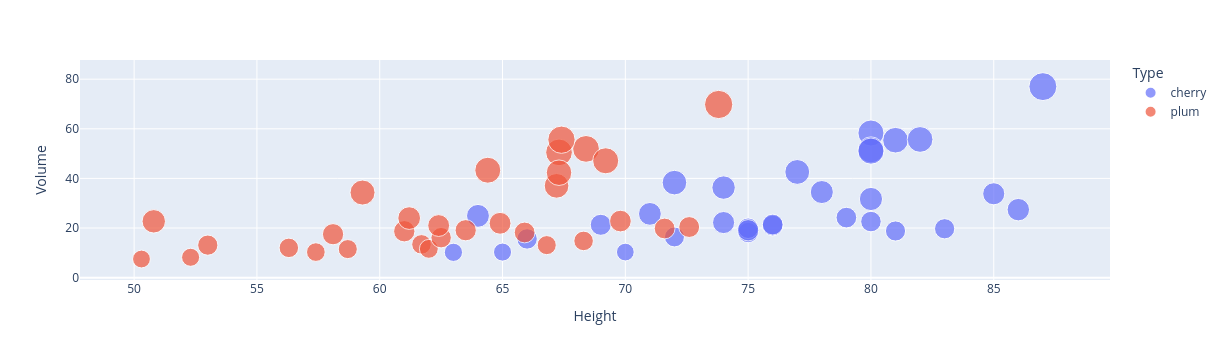

In [106]:
px.scatter(df,x="Height",y="Volume",color="Type",size="Girth")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="67" y="127"><mutation items="5"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="Height"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="Volume"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="aCZ,k0LzStF1D(+SB2%A"><field name="CODE">color="Type"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="4yv:pfYUrA=V0bO}PLcX"><field name="CODE">size="Girth"</field></block></value></block></xml>

Notice that in this scatterplot, each point **position** shows the relationship between `Height` and `Volume`, each point **size** shows `Girth`, and each **color** represents these values for a different `Type`.
It's not always possible to pack so much information into a single plot, but it can be extraordinarily useful when you can do it.
In this case, we can see that `Girth` also increases with `Height` and `Volume`, but this relationship does not appear to change with `Type`. 

### Modeling 1

Last time we looked at `trees`, we used `Height` to predict `Volume`.
With multiple linear regression, we can use more that one variable.
Let's start with using `Girth` and `Height` to predict `Volume`.

Start by importing `sklearn.linear_model` for regression and `numpy` for conversion:

- `import sklearn.linear_model as sklearn`
- `import numpy as np`

In [108]:
import sklearn.linear_model as linear_model
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable></variables><block type="importAs" id="m;0Uju49an!8G3YKn4cP" x="93" y="288"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><next><block type="importAs" id="^iL#`T{6G3.Uxfj*r`Cv"><field name="libraryName">numpy</field><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field></block></next></block></xml>

Create the regression model:

- Create variable `lm` (for linear model)
- Set it to `with sklearn create LinearRegression using`

In [110]:
lm = linear_model.LinearRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable></variables><block type="variables_set" id="!H`J#y,K:4I.h#,HPeK{" x="127" y="346"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><value name="VALUE"><block type="varCreateObject" id="h:O3ZfE(*c[Hz3sF=$Mm"><mutation items="1"></mutation><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></xml>

Train the model using all the data:

- with `lm` do `fit` using
    - `df [ ]`  (use {dictVariable} from LISTS) containing a list containing
        - `"Girth"` (this is $X_1$)
        - `"Height"` (this is $X_2$)
    - `df [ ]` containing a list containing
        - `"Volume"` (this is $Y$)

In [114]:
lm.fit(df[['Girth', 'Height']],df[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="129" y="135"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">Girth</field></block></value><value name="ADD1"><block type="text" id="#cqoT/|u(kuI^=VOHoB@"><field name="TEXT">Height</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

LinearRegression()

Go ahead and get the $r^2$ ; you can just copy the blocks from the last cell and change `fit` to `score`.

In [118]:
lm.score(df[['Girth', 'Height']],df[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="129" y="135"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">Girth</field></block></value><value name="ADD1"><block type="text" id="#cqoT/|u(kuI^=VOHoB@"><field name="TEXT">Height</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

0.9561010145657578

Based on that $r^2$, we'd think we have a really good model, right?

### Diagnostics 1

To check the model, the first thing we need to do is get the predictions from the model. 
Once we have the predictions, we can `assign` them to a column in the `df`:

- Set `df` to with `df` do `assign` using
    - freestyle `predictions1=` *followed by*
        - with `lm` do `predict` using
            - `df [ ]` containing a list containing
                - `"Girth"`
                - `"Height"`
- `df` (to display)

**This makes a very long block, so you probably want to create all the blocks and then connect them in reverse order.**

In [126]:
df = df.assign(predictions1= (lm.predict(df[['Girth', 'Height']])))

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="2" y="82"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="ou+aFod:USt{s9i+emN}"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="UFqs+Ox{QF6j*LkUvNvu"><field name="CODE">predictions1=</field><value name="INPUT"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="Asy|RX,d{QfgBQmjI{@@"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Girth</field></block></value><value name="ADD1"><block type="text" id="{vo.7:W51MOg?Ef(L-Rn"><field name="TEXT">Height</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="M$f:)yu6%B2SZyI:D+V+" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type,predictions1
0,8.3,70.0,10.3,0,cherry,6.826375
1,8.6,65.0,10.3,0,cherry,6.493821
2,8.8,63.0,10.2,0,cherry,6.707254
3,10.5,72.0,16.4,0,cherry,17.006587
4,10.7,81.0,18.8,0,cherry,20.809891
...,...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum,48.139871
58,18.8,67.3,50.5,1,plum,51.417419
59,19.7,67.4,55.6,1,plum,55.347671
60,17.2,67.3,42.3,1,plum,44.488323


Similarly, we want to add the residuals to `df`:
    
- Set `df` to with `df` do `assign` using
    - freestyle `residuals1=` *followed by* `df [ "Volume" ] - df [ "predictions1" ]`

- `df` (to display)

**Hint: use {dictVariable}[] and the + block from MATH**

In [133]:
df = df.assign(residuals1= (df['Volume'] - df['predictions1']))

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="-10" y="139"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">residuals1=</field><value name="INPUT"><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MINUS</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Volume</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">predictions1</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="h0wMz)I}*q%AYU/9Rp;o" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type,predictions1,residuals1
0,8.3,70.0,10.3,0,cherry,6.826375,3.473625
1,8.6,65.0,10.3,0,cherry,6.493821,3.806179
2,8.8,63.0,10.2,0,cherry,6.707254,3.492746
3,10.5,72.0,16.4,0,cherry,17.006587,-0.606587
4,10.7,81.0,18.8,0,cherry,20.809891,-2.009891
...,...,...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum,48.139871,-1.039871
58,18.8,67.3,50.5,1,plum,51.417419,-0.917419
59,19.7,67.4,55.6,1,plum,55.347671,0.252329
60,17.2,67.3,42.3,1,plum,44.488323,-2.188323


Now let's do some plots!

Let's check linearity and equal variance:

- Linearity means the residuals will be close to zero
- Equal variance means residuals will be evenly away from zero

- with `px` do `scatter` using
    - `df`
    - freestyle `x="predictions1"`
    - freestyle `y="residuals1"`

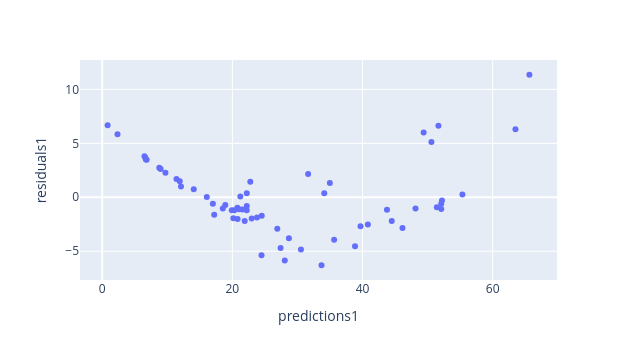

In [137]:
px.scatter(df,x="predictions1",y="residuals1")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="50" y="123"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="predictions1"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals1"</field></block></value></block></xml>

We see something very, very wrong here: a "U" shape from left to right.
This means our residuals are positive for low predictions, go negative for mid predictions, and go positive again for high predictions.
The only way this can happen is if something is quadratic (squared) in the phenomenon we're trying to model.

### Modeling 2

Step back for a moment and consider what we are trying to do.
We are trying to predict volume from other measurements of the tree.
What is the formula for volume?

$$V = \pi r^2 h$$

Since this is the mathematical definition, we don't expect any differences for `plum` vs. `cherry`.

What are our variables?

- `Volume`
- `Girth` (diameter, which is twice $r$)
- `Height`

In other words, we basically have everything in the formula.
Let's create a new column that is closer to what we want, `Girth` * `Girth` * `Height`:

- Set `df` to with `df` do `assign` using
    - freestyle `GGH=` *followed by* `df [ "Girth" ] * df [ "Girth" ] * df [ "Height" ]`

- `df` (to display)

In [145]:
df = df.assign(GGH= (df['Girth'] * (df['Girth'] * df['Height'])))

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="17" y="142"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">GGH=</field><value name="INPUT"><block type="math_arithmetic" id="5RK=q#[GZz]1)F{}r5DR"><field name="OP">MULTIPLY</field><value name="A"><shadow type="math_number" id="kDdp0NynnLT3.6o])vPm"><field name="NUM">1</field></shadow><block type="indexer" id="Xh!r5Y0#k:n+aqBjuvad"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="|4#UlYaNe-aeV+s$,Wn]"><field name="TEXT">Girth</field></block></value></block></value><value name="B"><shadow type="math_number" id=";S0XthTRZu#Q.w|qt88k"><field name="NUM">1</field></shadow><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MULTIPLY</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Girth</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">Height</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="|:#)c3^OVHRz0,Iw)mSN" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type,predictions1,residuals1,GGH
0,8.3,70.0,10.3,0,cherry,6.826375,3.473625,4822.300
1,8.6,65.0,10.3,0,cherry,6.493821,3.806179,4807.400
2,8.8,63.0,10.2,0,cherry,6.707254,3.492746,4878.720
3,10.5,72.0,16.4,0,cherry,17.006587,-0.606587,7938.000
4,10.7,81.0,18.8,0,cherry,20.809891,-2.009891,9273.690
...,...,...,...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum,48.139871,-1.039871,22172.372
58,18.8,67.3,50.5,1,plum,51.417419,-0.917419,23786.512
59,19.7,67.4,55.6,1,plum,55.347671,0.252329,26157.266
60,17.2,67.3,42.3,1,plum,44.488323,-2.188323,19910.032


As you might have noticed, `GGH` is an interaction. 
Often when we use interactions in a model, we also include the variables that the interactions are made of (also known as **main effects**).
However, in this case, that doesn't make sense because we know the interaction is close to the definition of `Volume`.

So let's fit a new model using *just* `GGH`, save its predictions and residuals, and plot its predicted vs. residual diagnostic plot.

First, fit the model:

- with `lm` do `fit` using
    - `df [ ]` containing a list containing
        - `"GGH"`
    - `df [ ]` containing a list containing
        - `"Volume"` 

In [149]:
lm.fit(df[['GGH']],df[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="96" y="130"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">GGH</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

LinearRegression()

### Diagnostics 2

Save the predictions:

- Set `df` to with `df` do `assign` using
    - freestyle `predictions2=` *followed by*
        - with `lm` do `predict` using
            - `df [ ]` containing a list containing
                - `"GGH"`
- `df` (to display)

In [155]:
df = df.assign(predictions2= (lm.predict(df[['GGH']])))

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="-4" y="123"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="ou+aFod:USt{s9i+emN}"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="UFqs+Ox{QF6j*LkUvNvu"><field name="CODE">predictions2=</field><value name="INPUT"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="rugUT!#.Lk(@nt!}4hC;"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="4nD6,I;gq.Y.D%v3$kFX"><field name="TEXT">GGH</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="f1yeKv2^vn4poU(:x!RQ" x="8" y="296"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type,predictions1,residuals1,GGH,predictions2
0,8.3,70.0,10.3,0,cherry,6.826375,3.473625,4822.300,10.120712
1,8.6,65.0,10.3,0,cherry,6.493821,3.806179,4807.400,10.089105
2,8.8,63.0,10.2,0,cherry,6.707254,3.492746,4878.720,10.240395
3,10.5,72.0,16.4,0,cherry,17.006587,-0.606587,7938.000,16.729991
4,10.7,81.0,18.8,0,cherry,20.809891,-2.009891,9273.690,19.563366
...,...,...,...,...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum,48.139871,-1.039871,22172.372,46.925109
58,18.8,67.3,50.5,1,plum,51.417419,-0.917419,23786.512,50.349155
59,19.7,67.4,55.6,1,plum,55.347671,0.252329,26157.266,55.378193
60,17.2,67.3,42.3,1,plum,44.488323,-2.188323,19910.032,42.126048


Save the residuals:
    
- Set `df` to with `df` do `assign` using
    - freestyle `residuals2=` *followed by* `df [ "Volume" ] - df [ "predictions2" ]`

- `df` (to display)


In [163]:
df = df.assign(residuals2= (df['Volume'] - df['predictions2']))

df

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="64" y="149"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><field name="MEMBER">assign</field><data>df:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">residuals2=</field><value name="INPUT"><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MINUS</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">Volume</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">predictions2</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="5+a8Y;3[A*+`N:?:J/]l" x="67" y="261"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></xml>

,Girth,Height,Volume,Type_plum,Type,predictions1,residuals1,GGH,predictions2,residuals2
0,8.3,70.0,10.3,0,cherry,6.826375,3.473625,4822.300,10.120712,0.179288
1,8.6,65.0,10.3,0,cherry,6.493821,3.806179,4807.400,10.089105,0.210895
2,8.8,63.0,10.2,0,cherry,6.707254,3.492746,4878.720,10.240395,-0.040395
3,10.5,72.0,16.4,0,cherry,17.006587,-0.606587,7938.000,16.729991,-0.329991
4,10.7,81.0,18.8,0,cherry,20.809891,-2.009891,9273.690,19.563366,-0.763366
...,...,...,...,...,...,...,...,...,...,...
57,17.9,69.2,47.1,1,plum,48.139871,-1.039871,22172.372,46.925109,0.174891
58,18.8,67.3,50.5,1,plum,51.417419,-0.917419,23786.512,50.349155,0.150845
59,19.7,67.4,55.6,1,plum,55.347671,0.252329,26157.266,55.378193,0.221807
60,17.2,67.3,42.3,1,plum,44.488323,-2.188323,19910.032,42.126048,0.173952


And now plot the predicted vs residuals to check linearity and equal variance:

- with `px` do `scatter` using
    - `df`
    - freestyle `x="predictions2"`
    - freestyle `y="residuals2"`

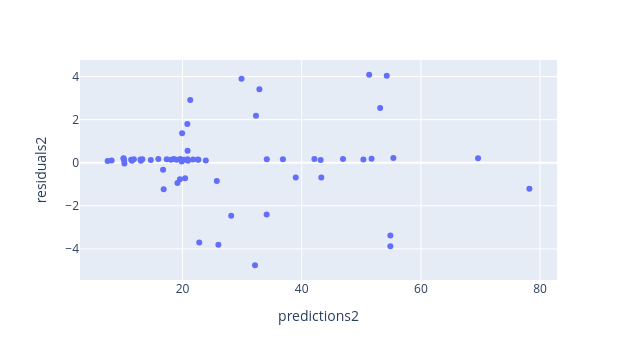

In [167]:
px.scatter(df,x="predictions2",y="residuals2")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="predictions2"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals2"</field></block></value></block></xml>

This is a pretty good plot.
Most of the residuals are close to zero, and what residuals aren't are fairly evenly spread.
We want to see an evenly spaced band above and below 0 as we scan from left to right, and we do.

With this new model, calculate $r^2$ by copying the blocks above and making appropriate adjustments:

In [171]:
lm.score(df[['GGH']],df[['Volume']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="FUXr7i7@?fN1xCAh/=Fn">df</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="18" y="91"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">GGH</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="FUXr7i7@?fN1xCAh/=Fn">df</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">Volume</field></block></value></block></value></block></value></block></xml>

0.9888672544444991

## Check your understanding

**Hover to see the correct answer.**

1.  What is the primary purpose of multiple regression models?
-  To determine the causal relationship between variables.
-  To analyze data with a categorical response variable.
-  <div><div title="Correct answer"> To predict a continuous response variable using multiple predictors and identify influential predictors.</div></div>
-  To visualize data in a 3D scatterplot.

2.  In the theoretical main effects multiple regression model $BW = \beta_0 + \beta_1 MA + \beta_2 MW + \beta_3 MH + \beta_4 GP+ \epsilon$, what does $\beta_0$ represent?
-  The effect of mother's age on birth weight.
-  <div><div title="Correct answer"> The expected birth weight when all predictor variables are zero.</div></div>
-  The random error term.
-  The variance of the birth weight.

3.  What does it mean if an interaction effect is significant in a multiple regression model?
-  The effects of the variables involved are additive.
-  <div><div title="Correct answer"> The effect of one predictor variable on the response depends on the level of another predictor variable.</div></div>
-  All main effects are also significant.
-  The model is overfitted.

4.  Based on the "Feature Selection" table, which predictor variable has a statistically significant impact on baby birth weight (using a p-value threshold of 0.05)?

    | Coefficients | Estimate | Std. Error | p-value |
    |--------------|----------|------------|---------|
    | Intercept    | 36.69    | 5.97       | 1.44e-6 |
    | MA           | 0.36     | 1.00       | 0.7197  |
    | MW           | 3.02     | 0.85       | 0.0014  |
    | MH           | -0.02    | 0.01       | 0.1792  |
    | GP           | -0.81    | 0.66       | 0.2311  |
-  MA (mother's age)
-  <div><div title="Correct answer"> MW (mother's weight)</div></div>
-  MH (mother's height)
-  GP (gestation period)

5.  Which of the following statements about multicollinearity is true?
-  It occurs when two variables have a weak correlation.
-  It helps in obtaining unique solutions for OLS parameter estimates.
-  <div><div title="Correct answer"> It occurs when two or more independent variables are highly linearly related, making parameter estimates unreliable.</div></div>
-  It is not a concern in multiple linear regression.

6.  In the "Categorical Variables" section, how are categorical variables like "mother's activity level" incorporated into a multiple regression model?
-  By assigning them numerical ranks (e.g., low=1, moderate=2, high=3).
-  <div><div title="Correct answer"> By creating dummy variables, where a 1 indicates the presence of a level and a 0 indicates its absence.</div></div>
-  By treating them as continuous variables and ignoring their categorical nature.
-  They cannot be directly used in multiple linear regression models.

7.  After fitting the initial `lm` model with `Girth` and `Height` to predict `Volume`, what did the scatterplot of `predictions1` vs. `residuals1` indicate?
-  The residuals were randomly scattered around zero, indicating a good fit.
-  The residuals showed a fan shape, indicating non-constant variance.
-  <div><div title="Correct answer"> The residuals formed a "U" shape, suggesting that a quadratic term or interaction might be missing from the model.</div></div>
-  The residuals were all positive, indicating an underestimation by the model.

8.  In the "Modeling 2" section, a new variable `GGH` was created as `Girth * Girth * Height`. Why was this specific interaction chosen?
-  Because it was the only possible two-way interaction.
-  <div><div title="Correct answer"> Because the mathematical formula for volume ($V = \pi r^2 h$) suggested a relationship involving the square of the radius (related to Girth) and Height.</div></div>
-  To intentionally create multicollinearity in the model.
-  To simplify the model by reducing the number of predictors.

<!--  -->